<a href="https://colab.research.google.com/github/ismarano/IAEntregable2/blob/master/entregable3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entregable 3

Importamos las librerias de fastai y os

In [0]:
from fastai.vision import *
import os
from google.colab import files

Vamos a buscar las imagenes, en este caso de coches, motos y camiones. Creamos archivos csv de cada uno.

Descargamos los ficheros

In [2]:
!wget https://raw.githubusercontent.com/IA1819/entregable3-ismarano/master/coche.csv?token=AKN7FSGGXML4AOVP4FX7EG244WF42 -O coche.csv
!wget https://raw.githubusercontent.com/IA1819/entregable3-ismarano/master/moto.csv?token=AKN7FSE7LRMLG7RE6ZEHFHC44WFAS -O moto.csv
!wget https://raw.githubusercontent.com/IA1819/entregable3-ismarano/master/camion.csv?token=AKN7FSGB6FUXUX547UEWAN244WEY2 -O camion.csv

--2019-05-15 18:05:08--  https://raw.githubusercontent.com/IA1819/entregable3-ismarano/master/coche.csv?token=AKN7FSGGXML4AOVP4FX7EG244WF42
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9680 (9.5K) [text/plain]
Saving to: ‘coche.csv’

coche.csv           100%[===================>]   9.45K  --.-KB/s    in 0s      

2019-05-15 18:05:08 (112 MB/s) - ‘coche.csv’ saved [9680/9680]

--2019-05-15 18:05:10--  https://raw.githubusercontent.com/IA1819/entregable3-ismarano/master/moto.csv?token=AKN7FSE7LRMLG7RE6ZEHFHC44WFAS
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting resp

Vamos a descargar las imagenes y ordenarlas por carpetas

In [3]:
folder = 'coche'
file = 'coche.csv'
path = Path('data/vehiculos')
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)
os.rename(file,path/file)
# Como mucho descargamos 200 imágenes
download_images(path/file,dest,max_pics=200)

Error https://www.todococheszafra.com/wp-content/uploads/2018/08/logo2018.png ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))


In [4]:
folder = 'moto'
file = 'moto.csv'
path = Path('data/vehiculos')
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)
os.rename(file,path/file)
# Como mucho descargamos 200 imágenes
download_images(path/file,dest,max_pics=200)

In [5]:
folder = 'camion'
file = 'camion.csv'
path = Path('data/vehiculos')
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)
os.rename(file,path/file)
# Como mucho descargamos 200 imágenes
download_images(path/file,dest,max_pics=200)

Error https://www.autonomosenruta.com/images/stories/imagenes_2017/imagenes_noviembre17/camion_scania450.jpg ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))


Vamos a eliminar las imagenes que tengan un formato que no pueda ser abierto en la libreria

In [6]:
for c in ['coche','moto','camion']:
  print(c)
  verify_images(path/c,delete=True,max_size=500)

coche


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/vehiculos/coche/00000067.svg'>
moto


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/vehiculos/moto/00000071.jpg'>
cannot identify image file <_io.BufferedReader name='data/vehiculos/moto/00000043.jpg'>
camion


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/vehiculos/camion/00000027.jpg'>
cannot identify image file <_io.BufferedReader name='data/vehiculos/camion/00000040.jpg'>
cannot identify image file <_io.BufferedReader name='data/vehiculos/camion/00000088.jpg'>
cannot identify image file <_io.BufferedReader name='data/vehiculos/camion/00000099.jpg'>


Almacenamos el dataset en la variable data.

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

Mostramos un batch del dataset

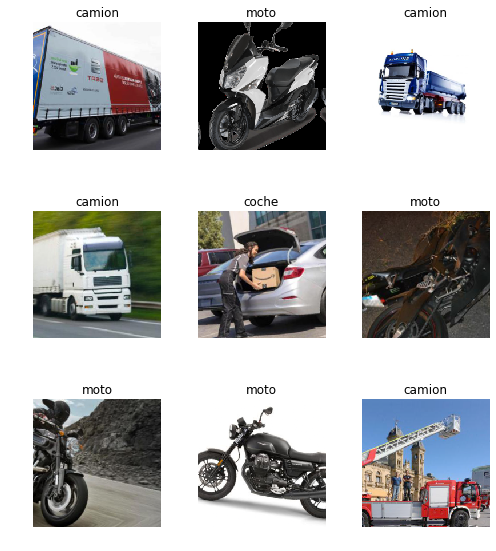

In [8]:
data.show_batch(rows=3,figsize=(7,8))

Creamos una red convolucional usando como base ResNet 34

In [9]:
learn = create_cnn(data,models.resnet34,metrics=[error_rate,accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


Vamos a actualizar los pesos de las ultimas capas

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.353781,0.647615,0.350877,0.649123,00:04
1,0.822704,0.086190,0.000000,1.000000,00:03
2,0.567339,0.037052,0.000000,1.000000,00:03
3,0.438493,0.033993,0.000000,1.000000,00:03


Guardamos el estado de nuestra red

In [0]:
learn.save('stage-1')

Descongelamos las capas de la red

In [0]:
learn.unfreeze()

Vamos a entrenar las capas de la red

In [13]:
learn.fit_one_cycle(4,max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.096631,0.034401,0.000000,1.000000,00:03
1,0.089655,0.030503,0.000000,1.000000,00:04
2,0.065769,0.034878,0.017544,0.982456,00:04
3,0.065140,0.034703,0.017544,0.982456,00:04


Guardamos el estado de la red

In [0]:
learn.save('stage-2')

Cargamos el estado que hemos guardado

In [15]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (232 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
moto,moto,moto,moto,moto
Path: data/vehiculos;

Valid: LabelList (57 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
moto,coche,camion,moto,coche
Path: data/vehiculos;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_st

Creamos una interpretacion de los resultados que hemos obtenido

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

Mostramos la matriz de confusion

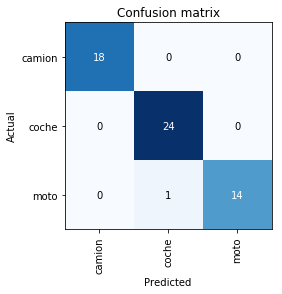

In [17]:
interp.plot_confusion_matrix()